# Acerca del conjunto de datos
# Contexto

Ramen Rater es un sitio web de reseñas de productos para los amantes del ramen (o "ramenfieles"), con más de 2500 reseñas hasta la fecha. Este conjunto de datos es una exportación de "La Gran Lista" (de reseñas), convertida a formato CSV.

# Contenido

Cada registro del conjunto de datos corresponde a una reseña de un producto de ramen. Los números de las reseñas son contiguos: las variedades de ramen revisadas más recientemente tienen números más altos. Marca, Variedad (el nombre del producto), País y Estilo (¿Taza? ¿Tazón? ¿Bandeja?) son bastante claros. Las estrellas indican la calidad del ramen, según la evaluación del revisor, en una escala de 5 puntos; ¡esta es la columna más importante del conjunto de datos!

Tenga en cuenta que este conjunto de datos no incluye el texto de las reseñas. Para ello, visite https://www.theramenrater.com/ .

# Expresiones de gratitud
Este conjunto de datos se vuelve a publicar tal cual desde la LISTA GRANDE original en https://www.theramenrater.com/ .

Inspiración
¿Qué ingredientes o sabores se anuncian con más frecuencia en las etiquetas de los paquetes de ramen?
¿Cómo se comparan las calificaciones del ramen con las de otros productos alimenticios (como, por ejemplo, el vino)?
¿Cómo se distribuye internacionalmente la producción de ramen?

**Importaciones**

In [68]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

**EDA**

In [69]:
path = 'C:\\Users\\gvald\\Desktop\\Proyecto2\\datasets\\dataset3.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [70]:
df = df.drop(columns=['Top Ten'])

In [71]:
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

In [72]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75


In [73]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [74]:
df.describe()

,review_#,stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


In [75]:
df.isna().sum() 

review_#    0
brand       0
variety     0
style       2
country     0
stars       3
dtype: int64

In [76]:
(df == '?').sum()

review_#    0
brand       0
variety     0
style       0
country     0
stars       0
dtype: int64

In [90]:
df.duplicated().sum()

np.int64(0)

In [89]:
df["style"].value_counts()

style
Pack    1533
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: count, dtype: int64

In [78]:
df[df["style"].isna()]

,review_#,brand,variety,style,country,stars
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00


In [79]:
moda = df['style'].mode()[0]
df['style'].fillna(moda, inplace=True)

C:\Users\gvald\AppData\Local\Temp\ipykernel_71216\4203464993.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['style'].fillna(moda, inplace=True)


In [83]:
df["variety"].value_counts()

variety
Beef                                                       7
Chicken                                                    7
Yakisoba                                                   6
Vegetable                                                  6
Artificial Chicken                                         6
                                                          ..
Cup Noodles Blacl Pepper Crab Flavour (More Angry Crab)    1
Song Song Kimchi Big Bowl                                  1
Instant Noodles Beef In Light Soup Flavour                 1
Hakata Ramen Noodle White Tonkotsu                         1
Top Ramen Creamy Chicken                                   1
Name: count, Length: 2413, dtype: int64

In [85]:
df["stars"].value_counts()

stars
4.000    393
5.000    386
3.750    350
3.500    335
3.000    176
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
1.100      2
2.300      2
3.100      2
4.125      2
2.900      2
2.800      2
0.750      1
3.300      1
2.100      1
3.125      1
2.125      1
0.900      1
0.100      1
3.700      1
3.400      1
3.600      1
2.850      1
3.200      1
3.650      1
1.800      1
Name: count, dtype: int64

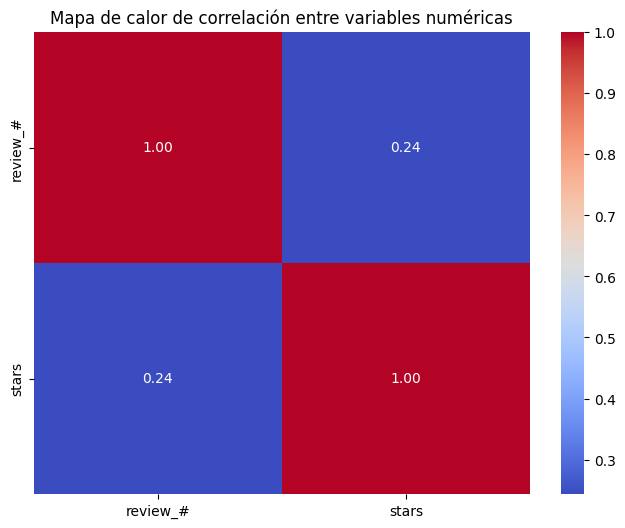

In [82]:
df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()